## Importuję biblioteki
* **numpy** do funkcji matematycznych i liczb losowych
* **matplotlib.pyplot** do wykresów

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Poniżej zaprezentuję działanie CTG (Centralnego twierdzenia granicznego)
* Zrobię 10 000 symulacji zmiennej losowej $Y$ jako sumy 100 liczb $X$ z rozkładu jednostajnego $[0,1]$
* Narysuję na jednym wykresie
    * Histogram zmiennej Y
    * Dopasowaną krzywą Gaussa na podstawie CTG
    * Dopasowaną krzywą Gaussa na podstawie danych numerycznych

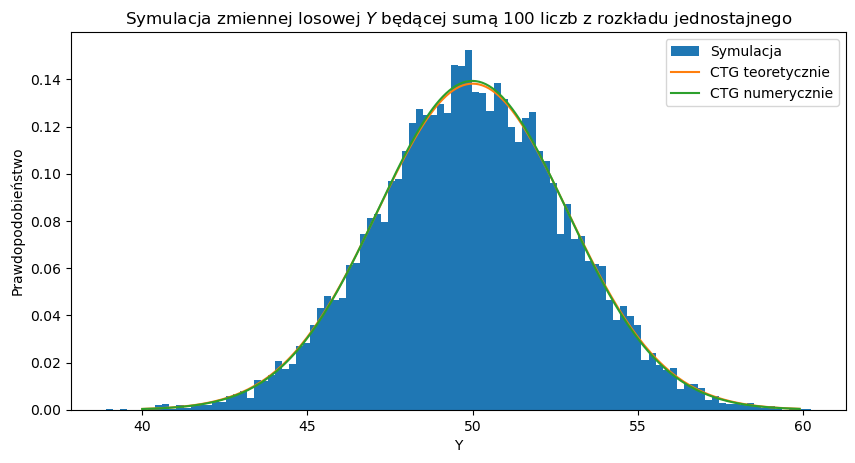

In [2]:
# liczba powtórzeń symulacji
N = 10**4

# tworzę tablicę 2D - u nas 10 000 x 100 i sumuję po drugiej współrzędnej (axis=1, ponieważ iterujemy od 0)
# w ten sposób otrzymam tablicę 10 000 zsumowanych liczb
X = np.random.rand(N, 100)
Y = X.sum(axis=1)

# definiuję funkcję Gaussa
def gauss(x, mu, sigma):
    ret = 1/(np.sqrt(2*np.pi)*sigma)
    ret = ret*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))
    return ret

# Parametry Gaussa z CTG policzone na zajęciach
mu_CTG = 100/2
sigma_CTG = np.sqrt(100/12)

# Parametry Gaussa wyliczone numerycznie
mu_num = np.mean(Y)
sigma_num = np.sqrt(np.var(Y))

# stworzę 3 wykresy na jednym rysunku
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.hist(Y, 100, density=True, label='Symulacja')

x = np.arange(40, 60, 0.1)
y1 = gauss(x, mu_CTG, sigma_CTG)
y2 = gauss(x, mu_num, sigma_num)
ax.plot(x, y1, label='CTG teoretycznie')
ax.plot(x, y2, label='CTG numerycznie')


ax.set_title(r"Symulacja zmiennej losowej $Y$ będącej sumą 100 liczb z rozkładu jednostajnego")
ax.set_xlabel('Y')
ax.set_ylabel('Prawdopodobieństwo')
ax.legend()

plt.show()

## A tutaj przedstawię działanie CTG dla rzutu kostki K6
Zmienna $Y$ będzie sumą oczek z 1000 kostek K6, a symulację powtórzę 10 000 razy

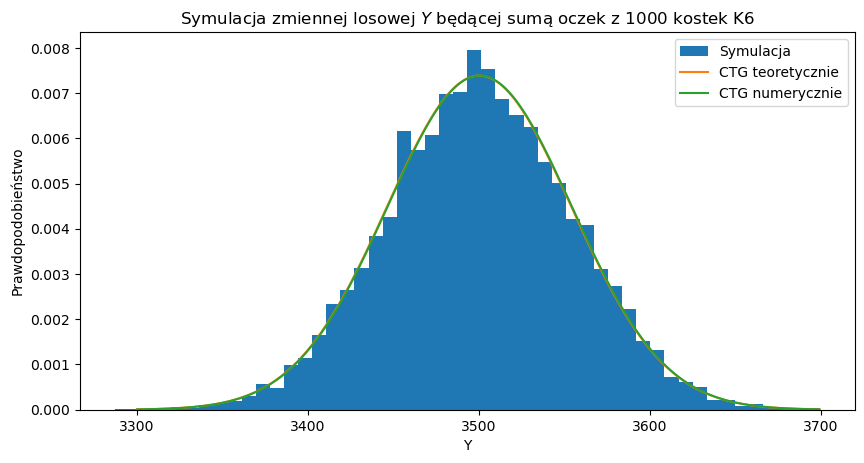

In [3]:
# liczba powtórzeń symulacji
N = 10**4

# tworzę tablicę 2D - u nas 10 000 x 1000 i sumuję po drugiej współrzędnej (axis=1, ponieważ iterujemy od 0)
# w tablicy są liczby losowe całkowite (randint) w przedziale [1,7) - czyli symulacja rzutu kostką K6
X = np.random.randint(1, 7, (N, 1000))
Y = X.sum(axis=1)

# definiuję funkcję Gaussa
def gauss(x, mu, sigma):
    ret = 1/(np.sqrt(2*np.pi)*sigma)
    ret = ret*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))
    return ret

# Parametry Gaussa z CTG (można samemu policzyć, albo znaleźć w źródłach internetowych)
mu_CTG = 1000*3.5
sigma_CTG = np.sqrt(1000*(35/12))

# Parametry Gaussa wyliczone numerycznie
mu_num = np.mean(Y)
sigma_num = np.sqrt(np.var(Y))

# stworzę 3 wykresy na jednym rysunku
fig, ax = plt.subplots(figsize=(10,5), dpi=100)

ax.hist(Y, 50, density=True, label='Symulacja')

x = np.arange(3300, 3700, 1)
y1 = gauss(x, mu_CTG, sigma_CTG)
y2 = gauss(x, mu_num, sigma_num)
ax.plot(x, y1, label='CTG teoretycznie')
ax.plot(x, y2, label='CTG numerycznie')

ax.set_title(r"Symulacja zmiennej losowej $Y$ będącej sumą oczek z 1000 kostek K6")
ax.set_xlabel('Y')
ax.set_ylabel('Prawdopodobieństwo')
ax.legend()

plt.show()